# **YOLO-POSE 모델**

## Import

In [ ]:
!pip install ultralytics

In [ ]:
import cv2
import torch
import random
import torch.nn as nn
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

In [ ]:
# model = YOLO('yolo11m-pose.pt')
model = YOLO('yolo11n-pose.pt')

## 이미지


0: 448x640 4 persons, 1536.5ms
Speed: 8.5ms preprocess, 1536.5ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)


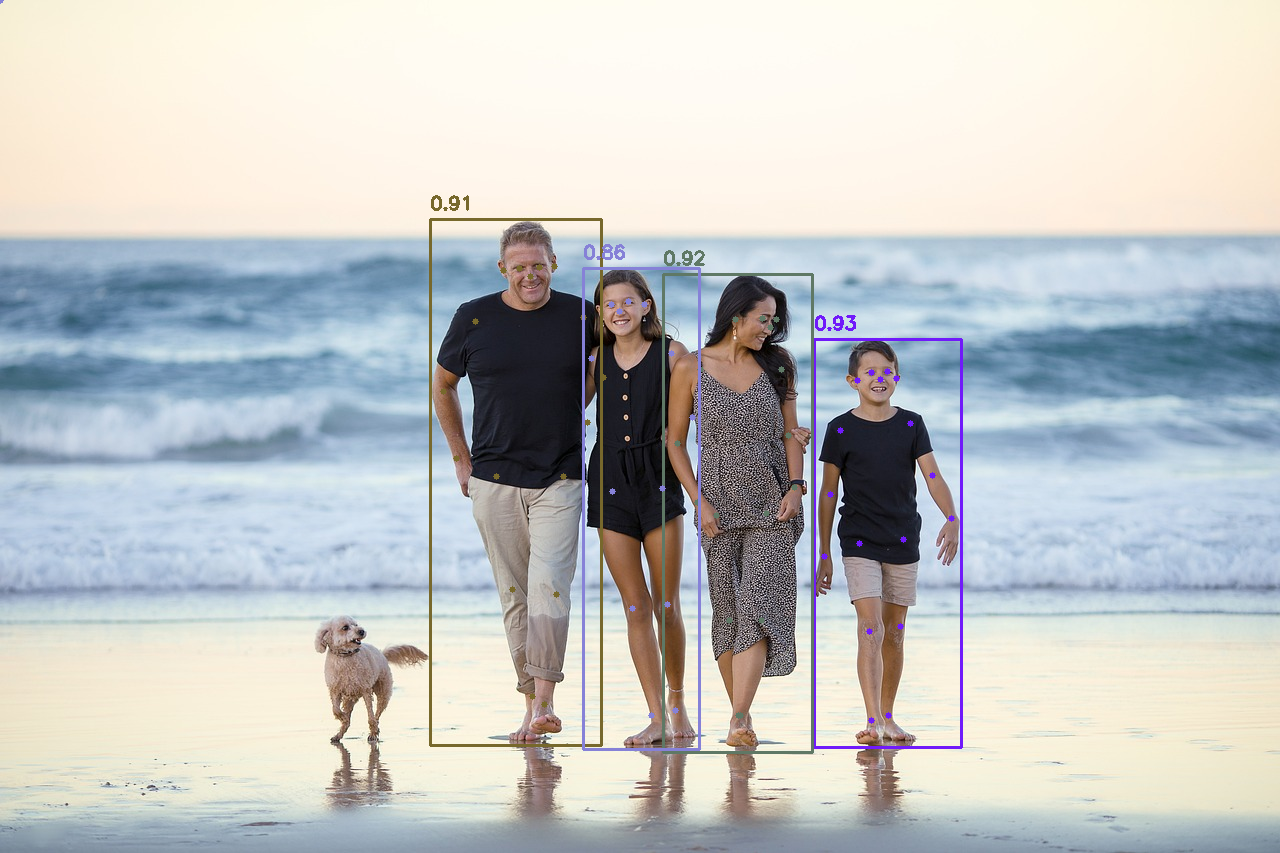

In [ ]:
img = cv2.imread('/content/family.jpg')
results = model(img)

for result in results:
  # 바운딩박스
  x1, y1, x2, y2 = zip(*result.boxes.xyxy.cpu().numpy().astype(int))
  conf = result.boxes.conf.cpu().numpy().astype(float)
  cls = result.boxes.cls.cpu().numpy().astype(int)

  for i in range(len(cls)):
    random.seed()
    color = [random.randint(0, 255) for _ in range(3)]
    key_x, key_y = zip(*result.keypoints.xy[i].cpu().numpy().astype(int))
    cv2.rectangle(img, (x1[i], y1[i]), (x2[i], y2[i]), color, 2)
    cv2.putText(img, f'{conf[i]:.2f}', (x1[i], y1[i] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

    # 키포인트값
    for j in range(len(key_x)):
      cv2.circle(img, (key_x[j], key_y[j]), 3, color, -1)

cv2_imshow(img)

## 동영상

In [ ]:
cap = cv2.VideoCapture('/content/cctv_assault_cut.mp4')

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('/content/out.mp4', fourcc, 24, (int(cap.get(3)), int(cap.get(4))))

while cap.isOpened():
  ret, frame = cap.read()
  if not ret:
    break

  results = model(frame)

  for result in results:
    # 바운딩박스
    x1, y1, x2, y2 = zip(*result.boxes.xyxy.cpu().numpy().astype(int))
    conf = result.boxes.conf.cpu().numpy().astype(float)
    cls = result.boxes.cls.cpu().numpy().astype(int)

    for i in range(len(cls)):
      random.seed()
      color = [random.randint(0, 255) for _ in range(3)]
      key_x, key_y = zip(*result.keypoints.xy[i].cpu().numpy().astype(int))
      cv2.rectangle(frame, (x1[i], y1[i]), (x2[i], y2[i]), color, 2)
      cv2.putText(frame, f'{conf[i]:.2f}', (x1[i], y1[i] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

      # 키포인트값
      for j in range(len(key_x)):
        cv2.circle(frame, (key_x[j], key_y[j]), 3, color, -1)

  out.write(frame)

cap.release()
out.release()
cv2.destroyAllWindows()


0: 384x640 3 persons, 1232.7ms
Speed: 4.0ms preprocess, 1232.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 947.8ms
Speed: 3.8ms preprocess, 947.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 858.6ms
Speed: 6.0ms preprocess, 858.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 887.5ms
Speed: 4.1ms preprocess, 887.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 836.0ms
Speed: 4.2ms preprocess, 836.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 866.7ms
Speed: 7.8ms preprocess, 866.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 822.0ms
Speed: 3.8ms preprocess, 822.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 870.9ms
Speed: 3.9ms preprocess, 870.9ms inference, 1.2ms postprocess pe

# **YOLO-POSE + Tracker**

## 이미지


0: 448x640 4 persons, 260.7ms
Speed: 5.1ms preprocess, 260.7ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


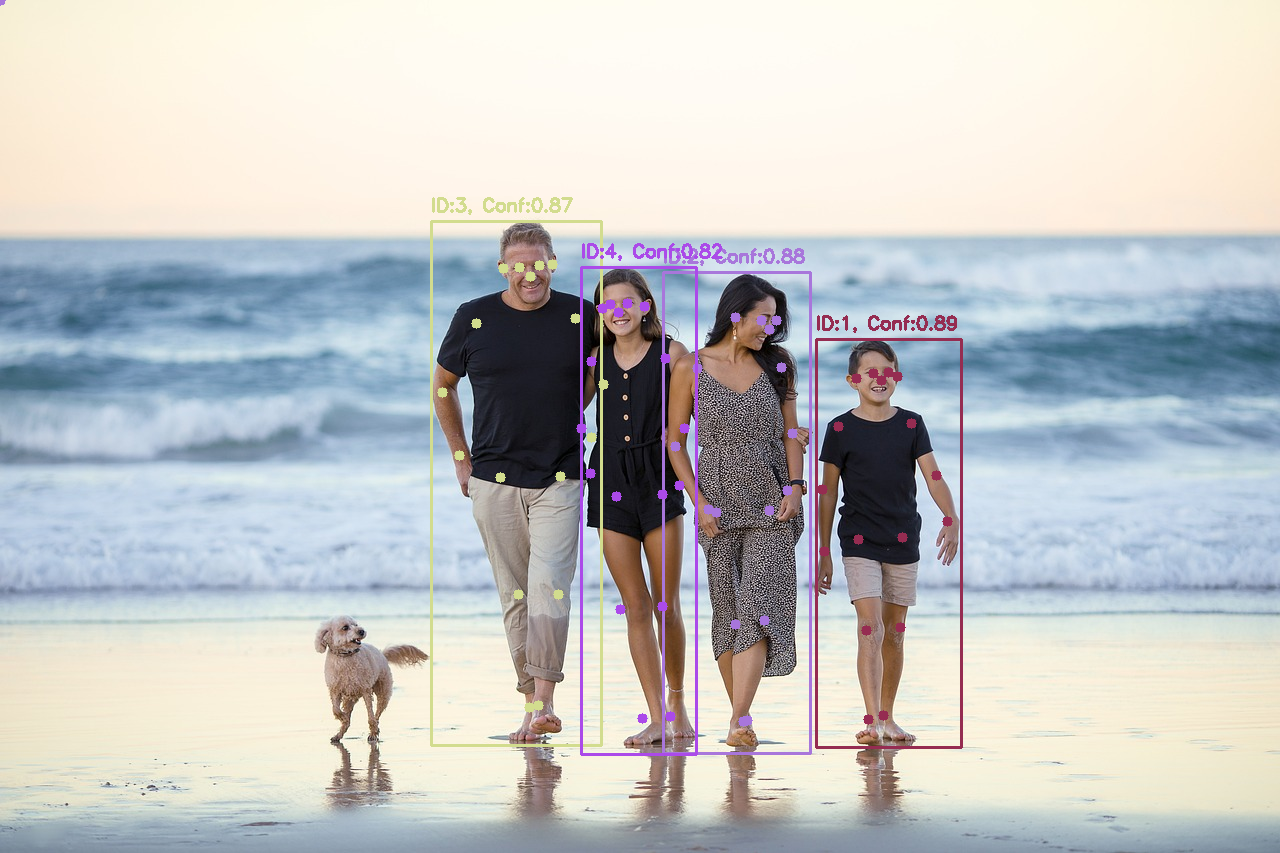

In [ ]:
img = cv2.imread('/content/family.jpg')
results = model.track(img)

for result in results:
  # 바운딩박스
  x1, y1, x2, y2 = zip(*result.boxes.xyxy.cpu().numpy().astype(int))
  conf = result.boxes.conf.cpu().numpy().astype(float)
  id = result.boxes.id.cpu().numpy().astype(int)

  for i in range(len(id)):
    random.seed()
    color = [random.randint(0, 255) for _ in range(3)]
    key_x, key_y = zip(*result.keypoints.xy[i].cpu().numpy().astype(int))
    cv2.rectangle(img, (x1[i], y1[i]), (x2[i], y2[i]), color, 2)
    cv2.putText(img, f'ID:{id[i]}, Conf:{conf[i]:.2f}', (x1[i], y1[i] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

    # 키포인트값
    for j in range(len(key_x)):
      cv2.circle(img, (key_x[j], key_y[j]), 5, color, -1)

cv2_imshow(img)

## 동영상

In [ ]:
cap = cv2.VideoCapture('/content/cctv_assault_cut.mp4')

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('/content/out2.mp4', fourcc, 24, (int(cap.get(3)), int(cap.get(4))))

while cap.isOpened():
  ret, frame = cap.read()
  if not ret:
    break

  results = model.track(frame)

  for result in results:
    # 바운딩박스
    x1, y1, x2, y2 = zip(*result.boxes.xyxy.cpu().numpy().astype(int))
    conf = result.boxes.conf.cpu().numpy().astype(float)
    id = result.boxes.id.cpu().numpy().astype(int)

    for i in range(len(id)):
      random.seed()
      color = [random.randint(0, 255) for _ in range(3)]
      key_x, key_y = zip(*result.keypoints.xy[i].cpu().numpy().astype(int))
      cv2.rectangle(frame, (x1[i], y1[i]), (x2[i], y2[i]), color, 2)
      cv2.putText(frame, f'ID:{id[i]}, Conf:{conf[i]:.2f}', (x1[i], y1[i] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

      # 키포인트값
      for j in range(len(key_x)):
        cv2.circle(frame, (key_x[j], key_y[j]), 3, color, -1)

  out.write(frame)

cap.release()
out.release()
cv2.destroyAllWindows()


0: 384x640 3 persons, 867.5ms
Speed: 3.8ms preprocess, 867.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 830.1ms
Speed: 4.1ms preprocess, 830.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 833.7ms
Speed: 4.3ms preprocess, 833.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 812.2ms
Speed: 4.0ms preprocess, 812.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 822.0ms
Speed: 4.3ms preprocess, 822.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 835.5ms
Speed: 4.2ms preprocess, 835.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 942.7ms
Speed: 4.1ms preprocess, 942.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 1312.7ms
Speed: 4.0ms preprocess, 1312.7ms inference, 1.4ms postprocess pe

## 동영상2차

In [ ]:
cap = cv2.VideoCapture('/content/cctv_assault_cut.mp4')

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('/content/out3.mp4', fourcc, 24, (int(cap.get(3)), int(cap.get(4))))

while cap.isOpened():
  ret, frame = cap.read()
  if not ret:
    break

  results = model.track(frame, tracker='botsort.yaml')

  for result in results:
    # 바운딩박스
    x1, y1, x2, y2 = zip(*result.boxes.xyxy.cpu().numpy().astype(int))
    conf = result.boxes.conf.cpu().numpy().astype(float)
    id = result.boxes.id.cpu().numpy().astype(int)

    for i in range(len(id)):
      random.seed()
      color = [random.randint(0, 255) for _ in range(3)]
      key_x, key_y = zip(*result.keypoints.xy[i].cpu().numpy().astype(int))
      cv2.rectangle(frame, (x1[i], y1[i]), (x2[i], y2[i]), color, 2)
      cv2.putText(frame, f'ID:{id[i]}, Conf:{conf[i]:.2f}', (x1[i], y1[i] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

      # 키포인트값
      for j in range(len(key_x)):
        cv2.circle(frame, (key_x[j], key_y[j]), 3, color, -1)

  out.write(frame)

cap.release()
out.release()
cv2.destroyAllWindows()


0: 384x640 3 persons, 816.0ms
Speed: 3.9ms preprocess, 816.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 816.9ms
Speed: 4.1ms preprocess, 816.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 796.1ms
Speed: 4.1ms preprocess, 796.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 804.7ms
Speed: 4.0ms preprocess, 804.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 837.7ms
Speed: 4.0ms preprocess, 837.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 1294.2ms
Speed: 4.2ms preprocess, 1294.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 1319.3ms
Speed: 4.7ms preprocess, 1319.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 879.2ms
Speed: 4.4ms preprocess, 879.2ms inference, 1.1ms postprocess 

## 동영상3차

In [ ]:
cap = cv2.VideoCapture('/content/cctv_assault_cut.mp4')

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('/content/out4.mp4', fourcc, 24, (int(cap.get(3)), int(cap.get(4))))

while cap.isOpened():
  ret, frame = cap.read()
  if not ret:
    break

  results = model.track(frame, tracker='botsort.yaml', persist=True)

  for result in results:
    # 바운딩박스
    x1, y1, x2, y2 = zip(*result.boxes.xyxy.cpu().numpy().astype(int))
    conf = result.boxes.conf.cpu().numpy().astype(float)
    id = result.boxes.id.cpu().numpy().astype(int)

    for i in range(len(id)):
      random.seed()
      color = [random.randint(0, 255) for _ in range(3)]
      key_x, key_y = zip(*result.keypoints.xy[i].cpu().numpy().astype(int))
      cv2.rectangle(frame, (x1[i], y1[i]), (x2[i], y2[i]), color, 2)
      cv2.putText(frame, f'ID:{id[i]}, Conf:{conf[i]:.2f}', (x1[i], y1[i] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

      # 키포인트값
      for j in range(len(key_x)):
        cv2.circle(frame, (key_x[j], key_y[j]), 5, color, -1)

  out.write(frame)

cap.release()
out.release()
cv2.destroyAllWindows()


0: 384x640 3 persons, 1297.1ms
Speed: 3.5ms preprocess, 1297.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 811.2ms
Speed: 4.0ms preprocess, 811.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 819.6ms
Speed: 4.0ms preprocess, 819.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 804.7ms
Speed: 4.2ms preprocess, 804.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 822.9ms
Speed: 4.0ms preprocess, 822.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 829.2ms
Speed: 4.1ms preprocess, 829.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 844.0ms
Speed: 5.8ms preprocess, 844.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 837.7ms
Speed: 4.1ms preprocess, 837.7ms inference, 1.4ms postprocess pe

## 동영상 4차

In [ ]:
cap = cv2.VideoCapture('/content/cctv_assault_cut.mp4')

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('/content/out5.mp4', fourcc, 24, (int(cap.get(3)), int(cap.get(4))))

while cap.isOpened():
  ret, frame = cap.read()
  if not ret:
    break

  results = model.track(frame, tracker='botsort.yaml', persist=True)

  for result in results:
    # 바운딩박스
    x1, y1, x2, y2 = zip(*result.boxes.xyxy.cpu().numpy().astype(int))
    conf = result.boxes.conf.cpu().numpy().astype(float)
    id = result.boxes.id.cpu().numpy().astype(int)

    for i in range(len(id)):
      random.seed(i)
      color = [random.randint(0, 255) for _ in range(3)]
      key_x, key_y = zip(*result.keypoints.xy[i].cpu().numpy().astype(int))
      cv2.rectangle(frame, (x1[i], y1[i]), (x2[i], y2[i]), color, 2)
      cv2.putText(frame, f'ID:{id[i]}, Conf:{conf[i]:.2f}', (x1[i], y1[i] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

      # 키포인트값
      for j in range(len(key_x)):
        cv2.circle(frame, (key_x[j], key_y[j]), 5, color, -1)

  out.write(frame)

cap.release()
out.release()
cv2.destroyAllWindows()


0: 384x640 3 persons, 144.7ms
Speed: 3.6ms preprocess, 144.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 153.6ms
Speed: 4.1ms preprocess, 153.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 233.2ms
Speed: 6.2ms preprocess, 233.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 218.4ms
Speed: 4.7ms preprocess, 218.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 252.0ms
Speed: 5.6ms preprocess, 252.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 227.1ms
Speed: 4.2ms preprocess, 227.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 241.4ms
Speed: 11.0ms preprocess, 241.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 170.5ms
Speed: 4.3ms preprocess, 170.5ms inference, 1.3ms postprocess per

## 이미지 2차


0: 448x640 4 persons, 147.8ms
Speed: 3.1ms preprocess, 147.8ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


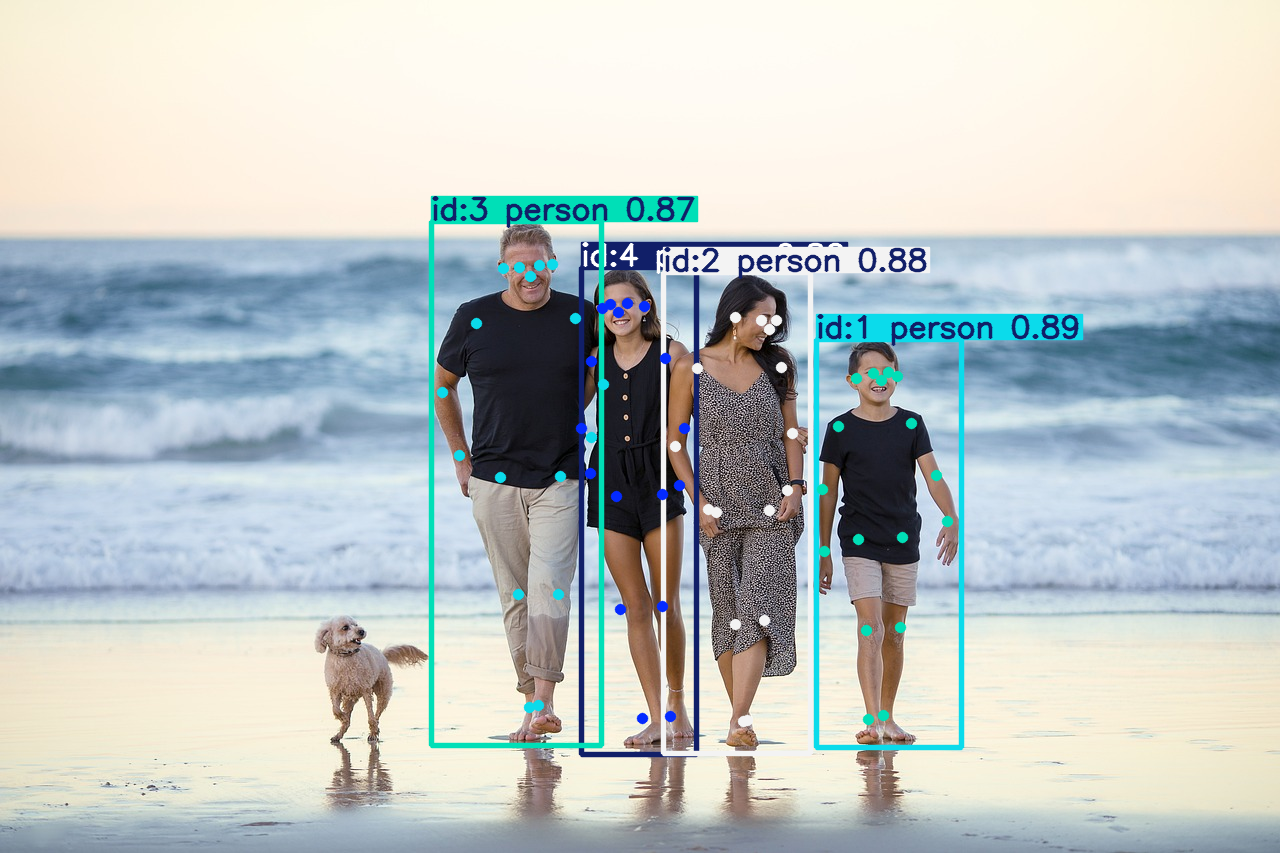

In [ ]:
img = cv2.imread('/content/family.jpg')
results = model.track(img)

for result in results:
  img = result.plot(
      conf=True,
      kpt_radius=5,
      kpt_line=False,
      boxes=True,
      # color_mode='class',
      color_mode='instance'
  )

cv2_imshow(img)

## 이미지 3차


0: 448x640 4 persons, 230.0ms
Speed: 5.0ms preprocess, 230.0ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)


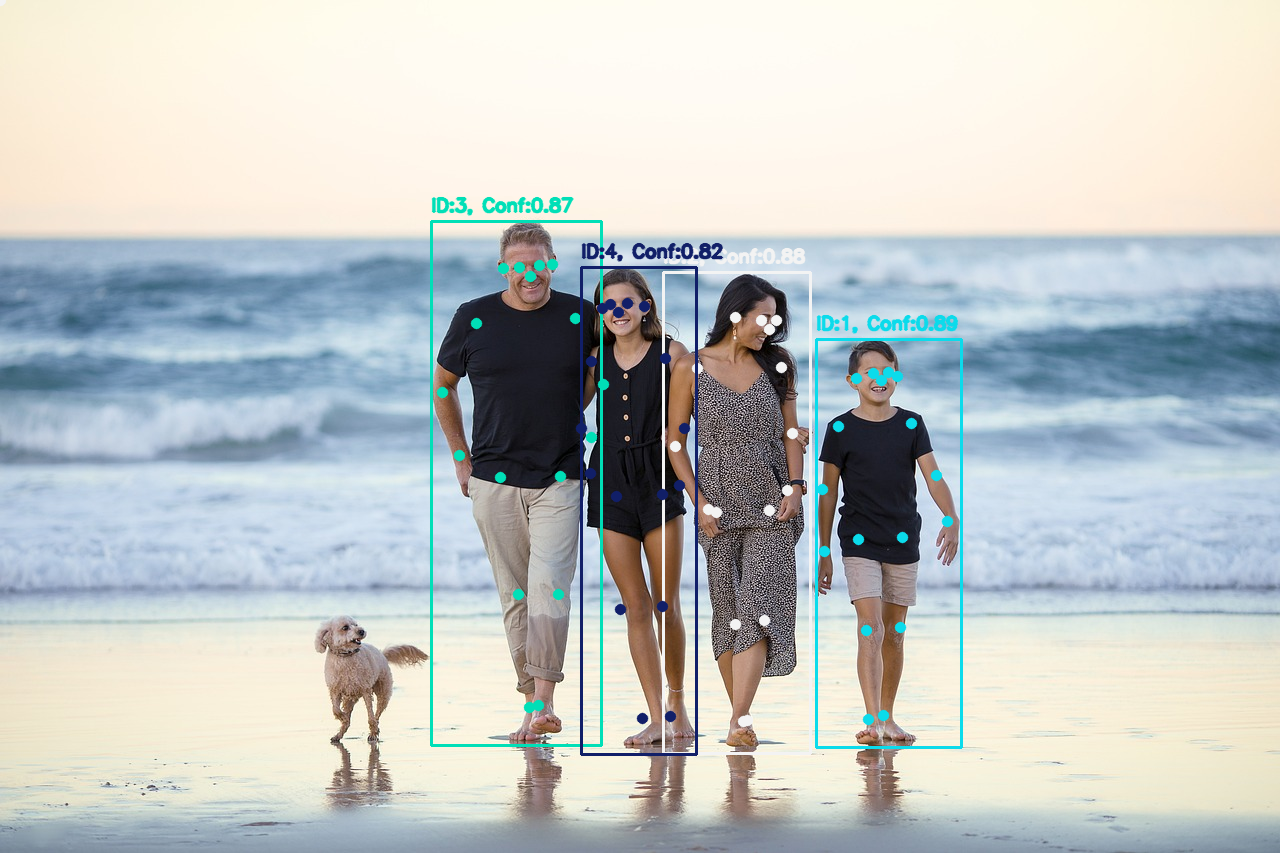

In [ ]:
from ultralytics.utils.plotting import Colors

img = cv2.imread('/content/family.jpg')
results = model.track(img)

color_palette = Colors()

for result in results:
  # 바운딩박스
  x1, y1, x2, y2 = zip(*result.boxes.xyxy.cpu().numpy().astype(int))
  conf = result.boxes.conf.cpu().numpy().astype(float)
  id = result.boxes.id.cpu().numpy().astype(int)

  for i in range(len(id)):
    color = color_palette(id[i], True)
    key_x, key_y = zip(*result.keypoints.xy[i].cpu().numpy().astype(int))
    cv2.rectangle(img, (x1[i], y1[i]), (x2[i], y2[i]), color, 2)
    cv2.putText(img, f'ID:{id[i]}, Conf:{conf[i]:.2f}', (x1[i], y1[i] - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2, lineType=cv2.LINE_AA)

    # 키포인트값
    for j in range(len(key_x)):
      cv2.circle(img, (key_x[j], key_y[j]), 5, color, -1, lineType=cv2.LINE_AA)

cv2_imshow(img)

## 동영상 5차

In [ ]:
from ultralytics.utils.plotting import Colors
color_palette = Colors()

cap = cv2.VideoCapture('/content/cctv_assault_cut.mp4')

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('/content/out7.mp4', fourcc, 24, (int(cap.get(3)), int(cap.get(4))))

while cap.isOpened():
  ret, frame = cap.read()
  if not ret:
    break

  results = model.track(frame, tracker='botsort.yaml', persist=True)

  for result in results:
    # 바운딩박스
    x1, y1, x2, y2 = zip(*result.boxes.xyxy.cpu().numpy().astype(int))
    conf = result.boxes.conf.cpu().numpy().astype(float)
    id = result.boxes.id.cpu().numpy().astype(int)

    for i in range(len(id)):
      color = color_palette(id[i], True)
      key_x, key_y = zip(*result.keypoints.xy[i].cpu().numpy().astype(int))
      cv2.rectangle(frame, (x1[i], y1[i]), (x2[i], y2[i]), color, 2)
      cv2.putText(frame, f'ID:{id[i]}, Conf:{conf[i]:.2f}', (x1[i], y1[i] - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2, lineType=cv2.LINE_AA)

      # 키포인트값
      for j in range(len(key_x)):
        cv2.circle(frame, (key_x[j], key_y[j]), 6, color, -1, lineType=cv2.LINE_AA)

  out.write(frame)

cap.release()
out.release()
cv2.destroyAllWindows()


0: 384x640 3 persons, 156.9ms
Speed: 6.9ms preprocess, 156.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 160.7ms
Speed: 4.9ms preprocess, 160.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 165.9ms
Speed: 4.6ms preprocess, 165.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 156.4ms
Speed: 5.4ms preprocess, 156.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 165.6ms
Speed: 4.9ms preprocess, 165.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 176.9ms
Speed: 5.6ms preprocess, 176.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 165.2ms
Speed: 4.2ms preprocess, 165.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 191.3ms
Speed: 4.0ms preprocess, 191.3ms inference, 1.7ms postprocess per 

## 동영상 6차

In [ ]:
from ultralytics.utils.plotting import Colors
color_palette = Colors()

cap = cv2.VideoCapture('/content/cctv_assault_cut.mp4')

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('/content/out7.mp4', fourcc, 24, (int(cap.get(3)), int(cap.get(4))))

while cap.isOpened():
  ret, frame = cap.read()
  if not ret:
    break

  results = model.track(frame, tracker='botsort.yaml', persist=True)

  for result in results:
    # 바운딩박스
    x1, y1, x2, y2 = zip(*result.boxes.xyxy.cpu().numpy().astype(int))
    conf = result.boxes.conf.cpu().numpy().astype(float)
    ids = result.boxes.id.cpu().numpy().astype(int)

    for i in range(len(ids)):
      if ids[i] == 1:
        color = color_palette(ids[i], True)
        key_x, key_y = zip(*result.keypoints.xy[i].cpu().numpy().astype(int))
        cv2.rectangle(frame, (x1[i], y1[i]), (x2[i], y2[i]), color, 2)
        cv2.putText(frame, f'ID:{ids[i]}, Conf:{conf[i]:.2f}', (x1[i], y1[i] - 10),
                  cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2, lineType=cv2.LINE_AA)

        # 키포인트값
        for j in range(len(key_x)):
          cv2.circle(frame, (key_x[j], key_y[j]), 6, color, -1, lineType=cv2.LINE_AA)

  out.write(frame)

cap.release()
out.release()
cv2.destroyAllWindows()


0: 384x640 3 persons, 166.5ms
Speed: 3.4ms preprocess, 166.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 154.8ms
Speed: 4.4ms preprocess, 154.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 161.3ms
Speed: 4.2ms preprocess, 161.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 157.8ms
Speed: 6.1ms preprocess, 157.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 165.2ms
Speed: 4.1ms preprocess, 165.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 160.8ms
Speed: 5.7ms preprocess, 160.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 165.8ms
Speed: 4.1ms preprocess, 165.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 161.4ms
Speed: 3.9ms preprocess, 161.4ms inference, 1.2ms postprocess per 